### Student Information
Name:  **Supakarn Jariyayong**

Student ID: **111065431**

GitHub ID: **supakarn-j**

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip) by right-clicking it and open as a new tab. The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [67]:
### Begin Assignment Here

# Agenda
### Take Home exercises
---
- [Exercise 2](#exercise2)
- [Exercise 5](#exercise5)
- [Exercise 6](#exercise6)
- [Exercise 8](#exercise8)
- [Exercise 10](#exercise10)
- [Exercise 11](#exercise11)
- [Exercise 12](#exercise12)
- [Exercise 13](#exercise13)
- [Exercise 14](#exercise14)
- [Exercise 15](#exercise15)
- [Exercise 16](#exercise16)

### Assignment 2
---
- [Data Preparation](#data_prep)
- [Data Transformation](#data_transf)
- [Dealing with missing value](#missing_val)
- [Dealing with duplicated value](#duplicated)
- [Data Preprocessing](#data_pre)  
  - [Sampling](#sampling)  
  - [Feature Creation](#feature_creation)
  - [Feature Subset Selection](#feature_subset)
  - [Dimensionality Reduction](#dimension_reduce)
  - [Atrribute Transformation / Aggregation](#aggregation)
  - [Discretization and Binarization](#discrete_bin)
- [Data Exploration](#data_explore)

### Assignment 3
---
- [Preparation](#prep)
- [Visualization](#visual)
- [Create Naive Bayes Classifiers](#naive_bayes)
  - [Bernoulli Naive Bayes Classifier](#bernoulli)
  - [Multinomial Naive Bayes Classifier](#multinomial)
  - [Gaussian Naive Bayes Classifier](#gaussian)

### Assignment 4
---
- [Suggestions](#suggestions)

## Take home assignment

In [68]:
# Preparation

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
                                  
# construct dataframe from a list
a = [[" ".join(x.split("\n"))] for x in twenty_train.data]
X = pd.DataFrame.from_records(a, columns= ['text'])
X[:2]
# add category to the dataframe
X['category'] = twenty_train.target

# # add category label also
c_name = [twenty_train.target_names[i] for i in twenty_train.target]
X['category_name'] = c_name

<a id='exercise2'></a>
### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [69]:
#Answer here
# Select with label
X.loc[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [70]:
# Select with position
X.iloc[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [71]:
X[90:100]

,text,category,category_name
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism
91,From: tp892275@vine.canberra.edu.au (C. Mierza...,1,comp.graphics
92,From: bolson@carson.u.washington.edu (Edward B...,1,comp.graphics
93,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
94,From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AI...,1,comp.graphics
95,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
96,From: orourke@sophia.smith.edu (Joseph O'Rourk...,1,comp.graphics
97,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
98,From: jmuller@ic.sunysb.edu (John S Muller) Su...,1,comp.graphics
99,From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...,0,alt.atheism


In [72]:
# Select only specific category
X[X['category_name'] == 'comp.graphics']

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
...,...,...,...
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,1,comp.graphics
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics


In [73]:
# Random select
X.sample(n=3)

,text,category,category_name
1885,From: dewey@risc.sps.mot.com (Dewey Henize) Su...,0,alt.atheism
635,From: rgc3679@bcstec.ca.boeing.com (Robert G. ...,1,comp.graphics
1444,From: jchen@wind.bellcore.com (Jason Chen) Sub...,2,sci.med


<a id='exercise5'></a>
### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [74]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [75]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer here**

In [76]:
print(type(np.nan))
print(type(None))
print(type('NaN'))
print(type('None'))
print(type(''))

<class 'float'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>



By the definitions of the function. This function `isnull()` takes scalar or array-like object and will indicates **NaN** and **None** object of the input

As shown in above cell the type `'Nan'`,`'None'` and `''` is `string`, so it does not match the criteria of `isnull()` function that will indicate missing value ```NaN``` with typpe of `float` or `None` with type of `NoneType`. That's why the function seeing dataframe index 2,3,5 has no missing value since they contain value of `'NaN'`,`'None'` and `''`

<a id='exercise6'></a>
### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [77]:
X_sample = X.sample(n=100)
X_sample[0:4]

,text,category,category_name
472,From: rsilver@world.std.com (Richard Silver) S...,2,sci.med
551,From: schwartz@ils.nwu.edu (diane schwartz) Su...,1,comp.graphics
1964,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
854,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism


**Answer here**  

An order of the data is shuffled(not in order) and the data is randomly selected from original data set

<a id='exercise8'></a>
### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

<AxesSubplot: >

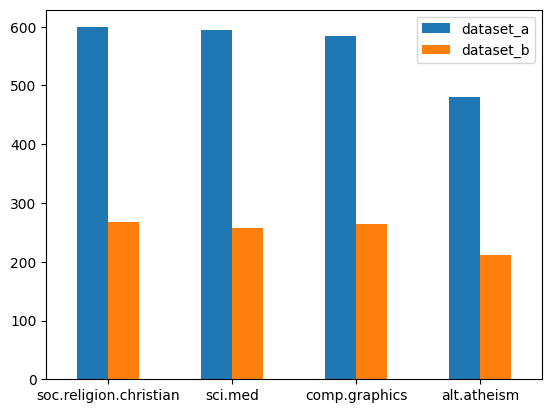

In [78]:
# Answer here
from itertools import count
import matplotlib.pyplot as plt
dataset_a = X
dataset_b = X.sample(n=1000)

compare = pd.concat([dataset_a.category_name.value_counts(), dataset_b.category_name.value_counts()], axis=1)

compare.columns = ["dataset_a","dataset_b"]
compare.plot(kind='bar', rot=0)



<a id='exercise10'></a>
### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [79]:
# Answer here
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
doc = X_counts[0:5,:100].toarray()[4]
terms = np.where(doc > 0)
for t in terms[0]:
    print(count_vect.get_feature_names_out()[t])
    

00
01


<a id='exercise11'></a>
### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

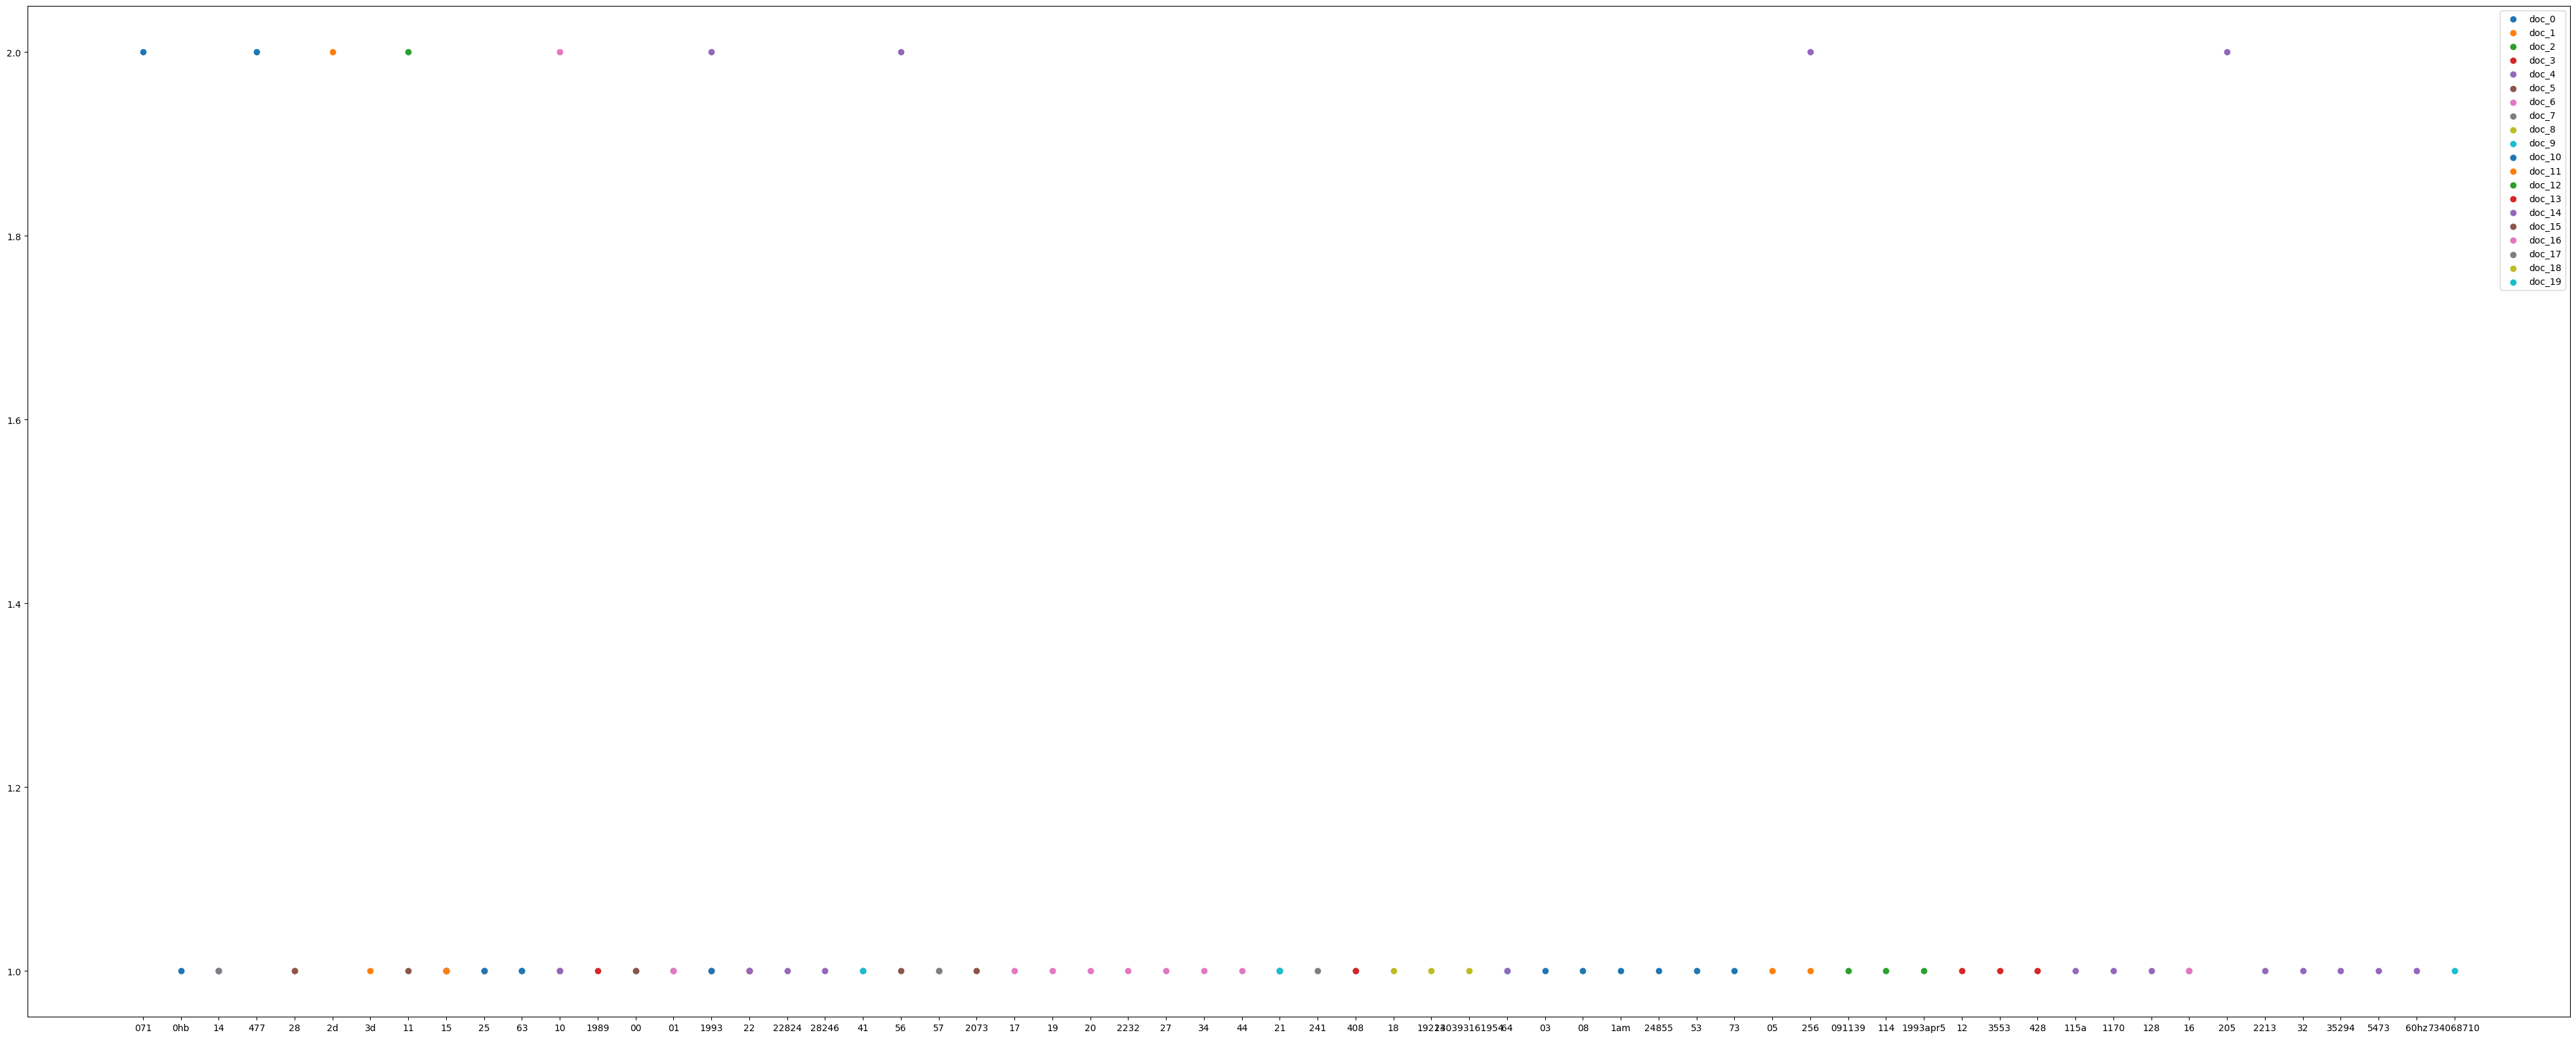

In [80]:
plt.subplots(figsize=(50,20))

for i in range(0,20):
    x, y = np.nonzero(X_counts[i,:3000].toarray())
    plt.scatter(count_vect.get_feature_names_out()[y],X_counts[i].toarray()[0][y], label="doc_{}".format(i))
plt.legend()


<a id='exercise12'></a>
### >>> **Exercise 12 (take home)**: 
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

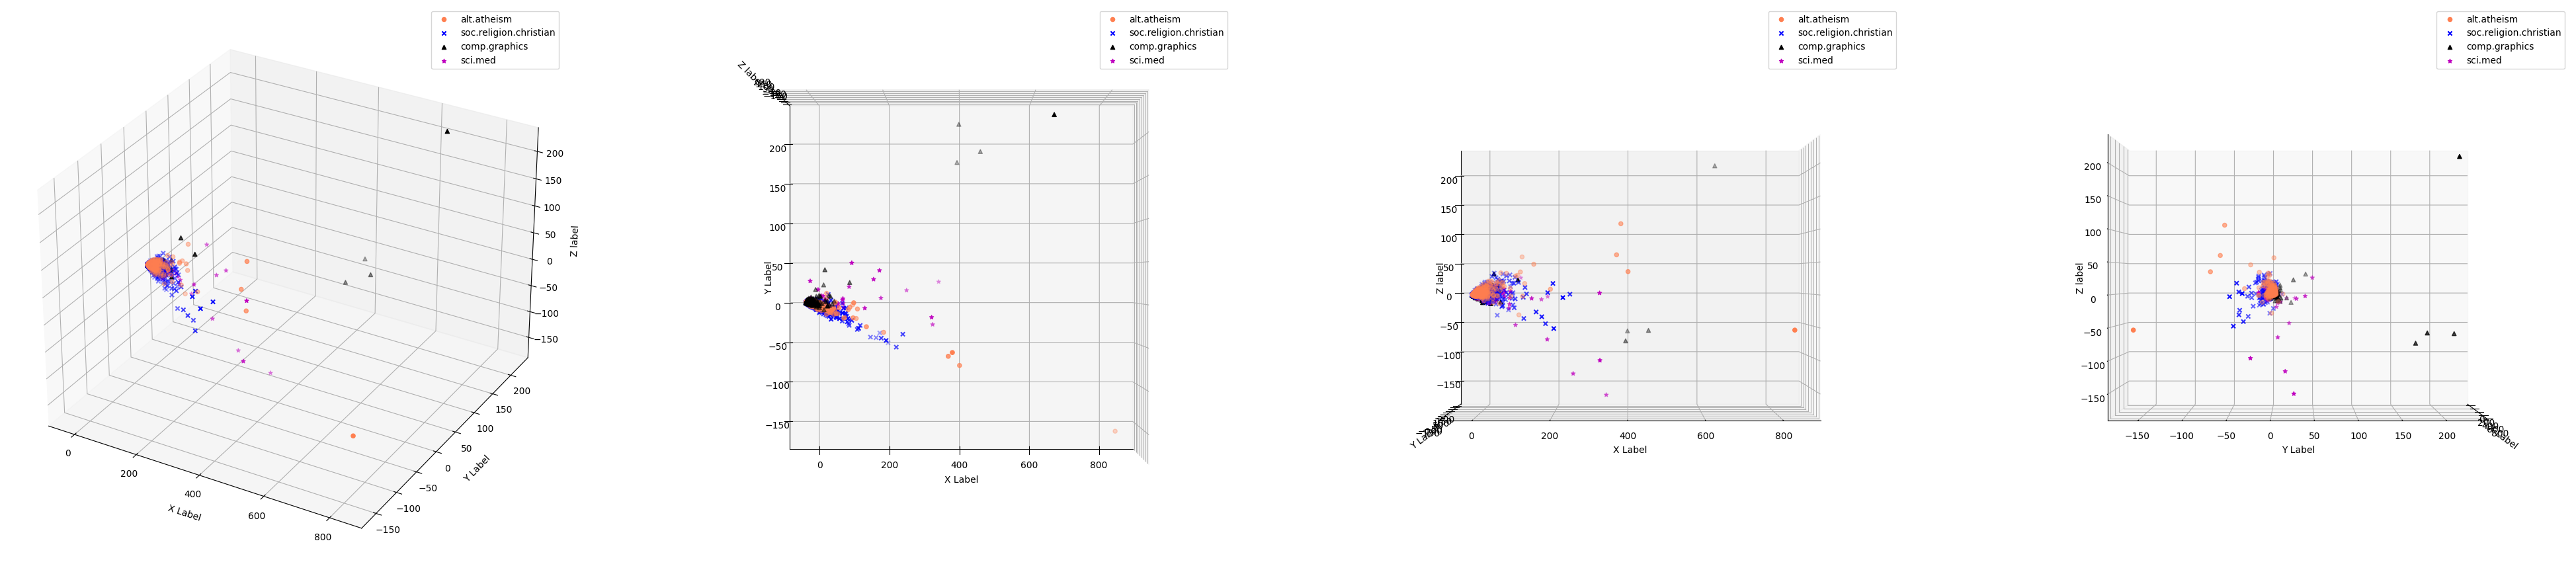

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

In [81]:
# Answer here
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

markers = ['o','x','^','*']
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (50,30))
ax = fig.subplots(1,4, subplot_kw=dict(projection='3d',xlabel='\nX Label',ylabel='\nY Label',zlabel='\nZ label'))

for c, category, m in zip(col, categories, markers):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    for a in ax:
        a.scatter(xs, ys, zs, c = c, marker=m, label=category)
        a.legend()
        a.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2, figure=plt.figure(figsize=(25,10)))

ax[1].view_init(90,-90)
ax[2].view_init(0,-90)
ax[3].view_init(0,0)

plt.show()

#### Findings

- from **XY aspect** I found that most of the data located around point (0,0) of the plane, but there are 4 group of outliers from `alt.atheism` and `comp.graphics` category located in the bottom right(2 groups in black triangle) and top left corner(2) of the plane.

- from **XZ aspect** most of the data also crowded around origin point(0,0) of the plane and also 2 outliers from `alt.atheism` and `comp.graphics`category located at far right and the top of the plane and another group of outlier from `sci.med` at the bottom of the plane.

- from **YZ aspect** as same as the above mentioned aspect most of the data reside at origin point(0,0) and there are 3 groups of outliers from `alt.atheism` in the left of the plane, `comp.graphics` at the right and top right corner and `sci.med` at the bottom of the plane

<a id='exercise13'></a>
### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [36]:
import plotly.express as px
import pandas as pd

tf = np.asarray(X_counts.sum(axis=0))[0]

df = pd.DataFrame(tf, columns=['freq'])
df['terms'] = count_vect.get_feature_names_out()
fig = px.bar(df[:300],x='terms',y='freq')
fig.show()

![](plotly/ex13.png)

<a id='exercise14'></a>
### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [37]:
# Answer here
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

## Remove stop words(eg. 'the','and','I') from documents and tokenize only "word"
count_vect = CountVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]+\b')
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
df = pd.DataFrame(term_frequencies, columns=['freq'])
df['terms'] = count_vect.get_feature_names_out()

fig = px.bar(df[:300],x='terms',y='freq')
fig.show()

![](plotly/ex14.png)

<a id='exercise15'></a>
### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [38]:
# Answer here
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
df = pd.DataFrame(term_frequencies, columns=['freq'])
df['terms'] = count_vect.get_feature_names_out()
df.sort_values(by='freq',ascending=False,inplace=True)
fig = px.bar(df[:300],x='terms',y='freq')
fig.show()


![](plotly/ex15.png)

<a id='exercise16'></a>
### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

**Ans**: It is work!!

In [39]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[:10]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


---

<a id='data_prep'></a>
## Assignment 2


<a id='data_prep'></a>
### 1.Data Preparation

In [40]:
import sklearn.datasets
import pandas as pd
import helpers.data_mining_helpers as dmh

## Load data
new_data = sklearn.datasets.load_files("sentiment_labelled_sentences",encoding='utf-8',random_state=42)

## Format data
### seperate row by splitting each text with "\n"

<a id='data_transf'></a>
### 2.Data Transformation

In [41]:
## Create data frame with new formatted data
df = pd.DataFrame(dmh.format_rows(new_data))
df.columns = ['text','score','category']
df

,text,score,category
0,So there is no way for me to plug it in here i...,0,0
1,"Good case, Excellent value.",1,0
2,Great for the jawbone.,1,0
3,Tied to charger for conversations lasting more...,0,0
4,The mic is great.,1,0
...,...,...,...
2995,I think food should have flavor and texture an...,0,2
2996,Appetite instantly gone.,0,2
2997,Overall I was not impressed and would not go b...,0,2
2998,"The whole experience was underwhelming, and I ...",0,2


In [42]:
## Adding score and category columns 
df['category_name'] = df.category.apply(lambda x: dmh.format_labels(x, new_data))
df

,text,score,category,category_name
0,So there is no way for me to plug it in here i...,0,0,amazon
1,"Good case, Excellent value.",1,0,amazon
2,Great for the jawbone.,1,0,amazon
3,Tied to charger for conversations lasting more...,0,0,amazon
4,The mic is great.,1,0,amazon
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,2,yelp
2996,Appetite instantly gone.,0,2,yelp
2997,Overall I was not impressed and would not go b...,0,2,yelp
2998,"The whole experience was underwhelming, and I ...",0,2,yelp


<a id=missing_val></a>
### 3.Dealing with Missing Value

In [43]:
## Check for missing value by columns
df.isnull().sum()

text             0
score            0
category         0
category_name    0
dtype: int64

In [44]:
## Check for missing value by row
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Length: 3000, dtype: int64

In [45]:
## Add new data woth missing value
dummy = {'text': ['missimg value'], 'score': 0}
df = pd.concat([df,pd.DataFrame(dummy)], ignore_index=True)

In [46]:
## Check for missing value again
df.isnull().sum()

text             0
score            0
category         1
category_name    1
dtype: int64

In [47]:
## Drop record with missing value
df.dropna(inplace=True)

## Check for missing value
df.isnull().sum()

text             0
score            0
category         0
category_name    0
dtype: int64

<a id='duplicated'></a>
### 4.Deal with duplicate value

In [48]:
## Count for duplicated value
df.duplicated().sum()

17

In [49]:
## show duplicated value
df[df.duplicated() == True]

,text,score,category,category_name
285,Great phone!.,1,0.0,amazon
407,Works great.,1,0.0,amazon
524,Works great!.,1,0.0,amazon
543,Don't buy this product.,0,0.0,amazon
744,If you like a loud buzzing to override all you...,0,0.0,amazon
748,Does not fit.,0,0.0,amazon
778,This is a great deal.,1,0.0,amazon
792,Great Phone.,1,0.0,amazon
892,Excellent product for the price.,1,0.0,amazon
896,Great phone.,1,0.0,amazon


In [50]:
## Drop duplicated value
df.drop_duplicates(inplace=True,keep='first') # keep='first' means drop all duplicated record, but keep the first copy

## Check for duplicated record
df.duplicated().sum()

0

<a id='data_pre'></a>
### 5.Data preprocessing
<a id='sampling'></a>
#### 5.1 Sampling

In [51]:
## get 300 Sampling data from original dataframe
df.sample(n=300)

,text,score,category,category_name
975,It is the best charger I have seen on the mark...,1,0.0,amazon
1949,Simply beautiful.,1,1.0,imdb
577,That company is a joke.,0,0.0,amazon
1944,"However, after finally watching this film, I r...",1,1.0,imdb
1501,"I left the theater with a lilt in my step, joy...",1,1.0,imdb
...,...,...,...,...
2091,"It's like a really sexy party in your mouth, w...",1,2.0,yelp
1995,I just got bored watching Jessice Lange take h...,0,1.0,imdb
621,DO NOT BUY DO NOT BUYIT SUCKS,0,0.0,amazon
898,Everything about this product is wrong.First,0,0.0,amazon


imdb      101
amazon    100
yelp       99
Name: category_name, dtype: int64


<AxesSubplot: >

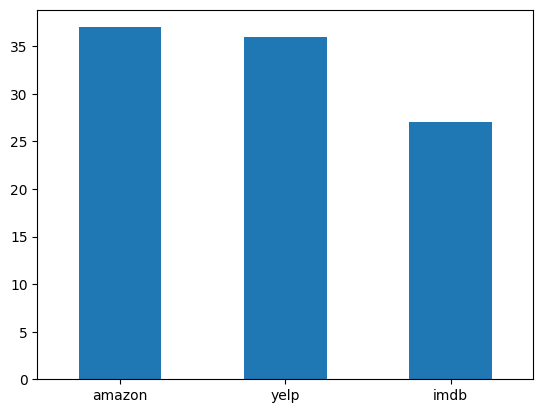

In [52]:
## Plot category distribution graph of sampled data
print(df.sample(n=300).category_name.value_counts())
df.sample(n=100).category_name.value_counts().plot(kind='bar',rot=0)

<a id='feature_creation'></a>
#### 5.2 Feature Creation

In [53]:
import nltk

## tokenized text in dataframe
### takes a like a minute or two to process
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
list(df[:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

<a id='feature_subset'></a>
### 5.3 Feature subset selection

In [54]:
## Vectorize text using built-in function of scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

df_vect = CountVectorizer()

df_counts = df_vect.fit_transform(df.text)
print(df_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [55]:
analyze = df_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now !!!!!")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [56]:
# We can check the shape of this matrix:
df_counts.shape

(2983, 5155)

In [57]:
# Get terms out of the vectorizer
df_vect.get_feature_names_out()[:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [58]:
# we convert from sparse array to normal array
import numpy as np
df_counts[0:5, 0:100].toarray()[0]
np.where(df_counts[0:5,:].toarray()[0] > 0)

(array([ 647, 1013, 1829, 1982, 2158, 2314, 2427, 2432, 2809, 3043, 3387,
        4161, 4531, 4545, 4609, 4793, 4835, 4987], dtype=int64),)

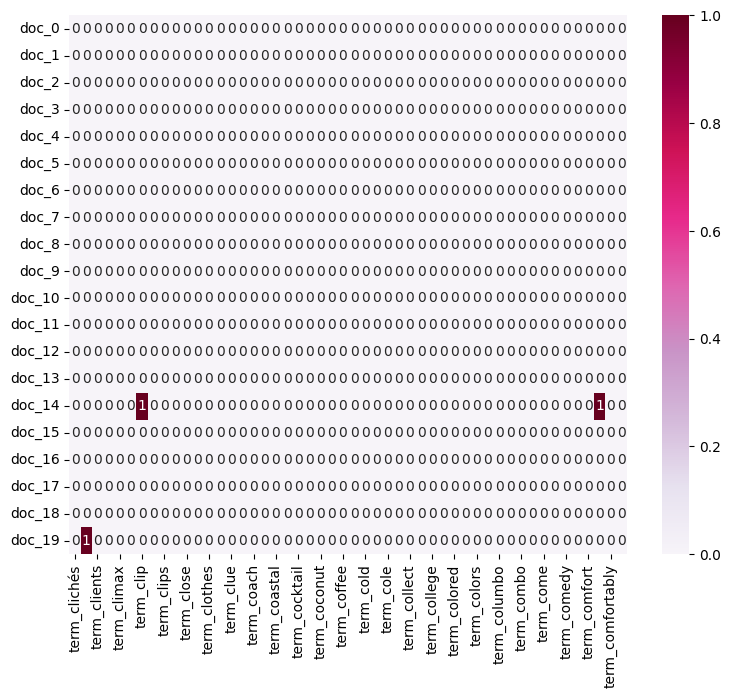

In [59]:
## Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# get first 20 terms on the dicument
plot_x = ["term_"+str(i) for i in df_vect.get_feature_names_out()[850:900]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

plot_z = df_counts[0:20, 850:900].toarray()
plot_z

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

<a id='dimension_reduce'></a>
### 5.4 Dimensionality reduction

(2983, 2)


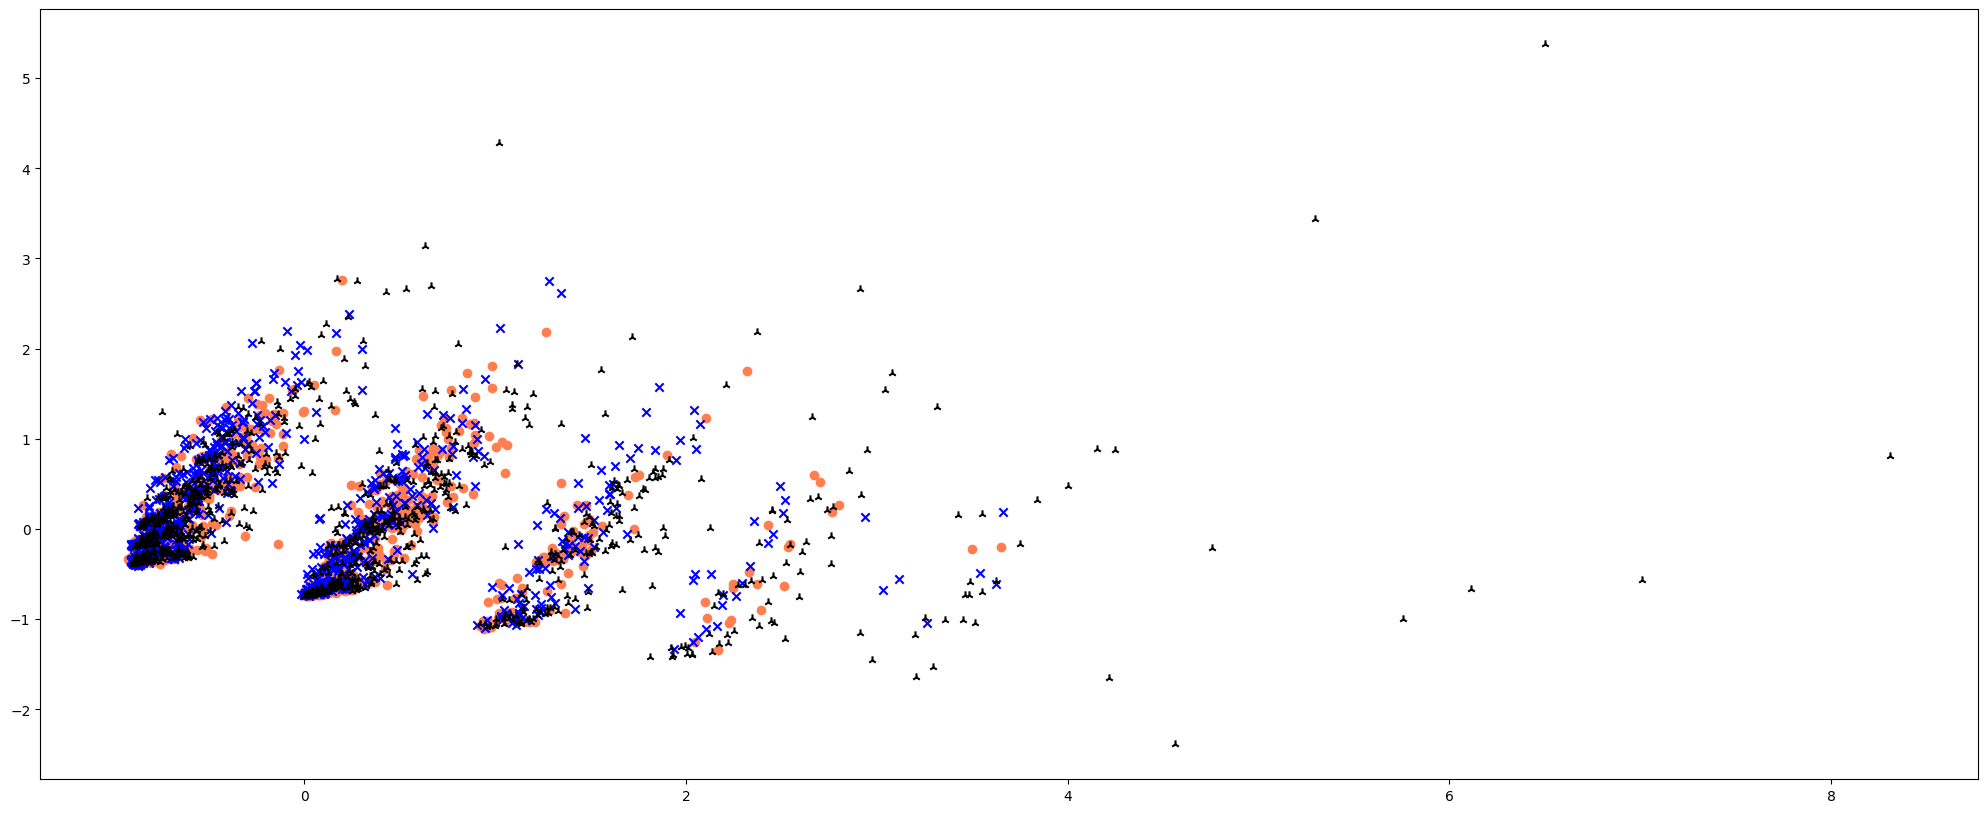

In [60]:
## Usuing PCA technique to reduce the dimension of document
from sklearn.decomposition import PCA

df_reduced = PCA(n_components=2).fit_transform(df_counts.toarray())

## Check dimension
print(df_reduced.shape)

## Create scatter plot
col = ['coral', 'blue', 'black', 'orange']
categories = ['yelp','amazon','imdb']
markers = ['o','x','2']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category, m in zip(col, categories, markers):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker=m)

<a id='aggregation'></a>
### 5.5 Attribute Tranformation / Aggregation

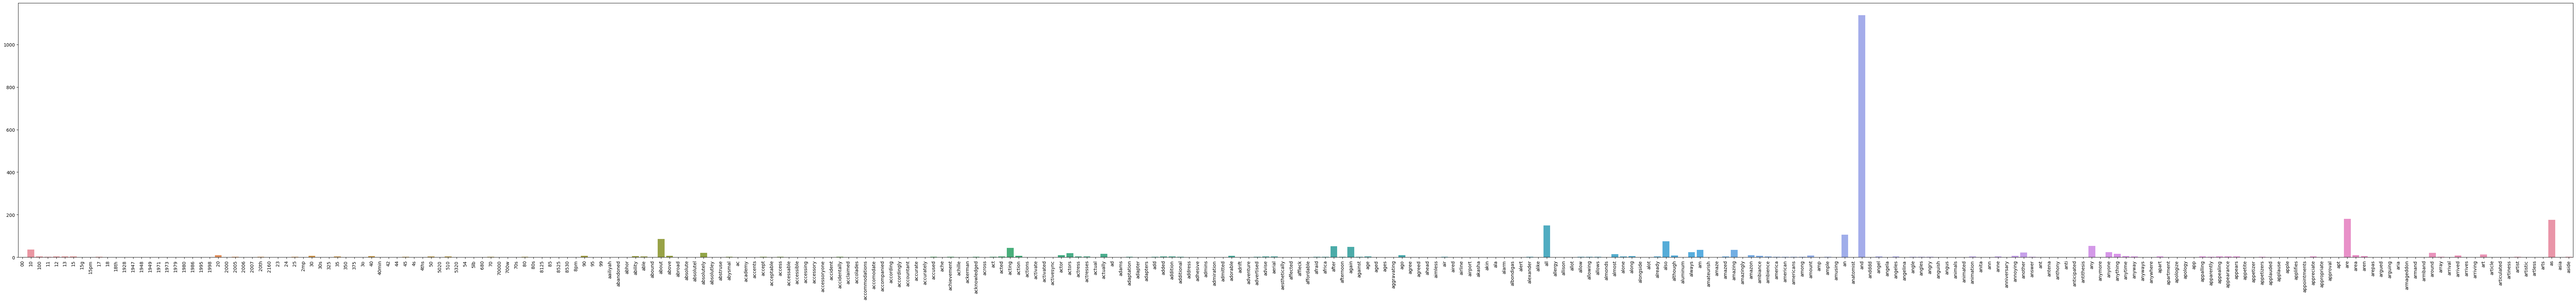

In [61]:
## calculate frequncy of each term
term_freq = np.asarray(df_counts.sum(axis=0))[0]


## plot histogram of each term
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_vect.get_feature_names_out()[:300], 
            y=term_freq[:300])
g.set_xticklabels(df_vect.get_feature_names_out()[:300], rotation = 90);

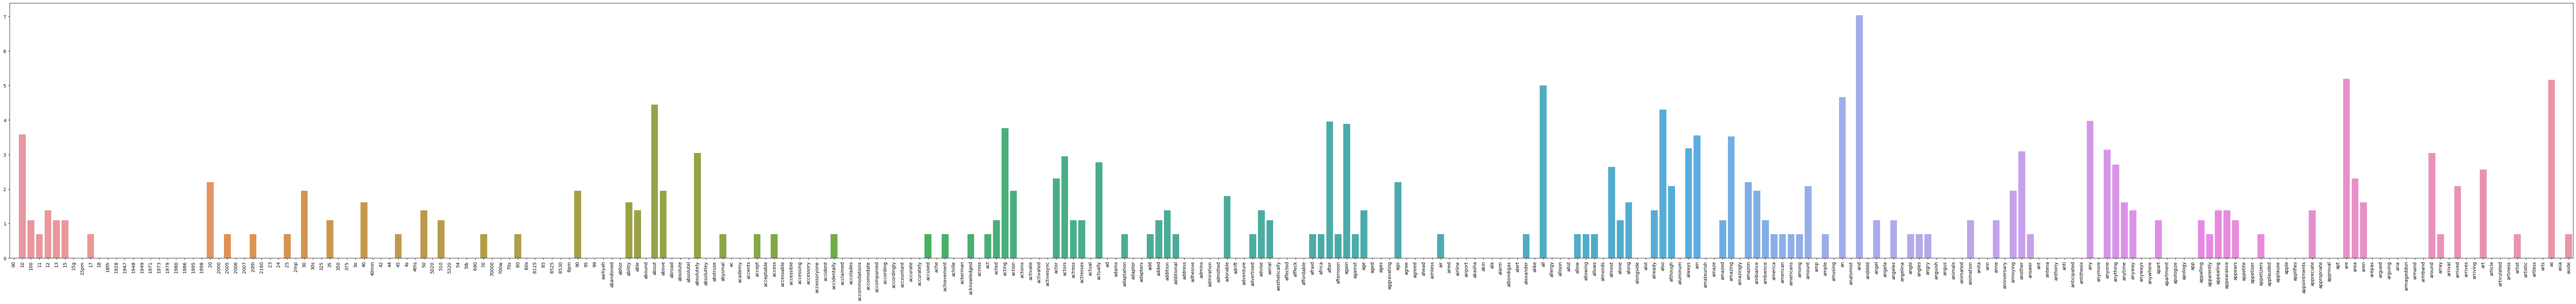

In [62]:
## Transform freq attribute with log scale
import math

term_freq_log = [math.log(i) for i in term_freq]

## plot new histogram with log scale
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_vect.get_feature_names_out()[:300],
                y=term_freq_log[:300])
g.set_xticklabels(df_vect.get_feature_names_out()[:300], rotation = 90);

In [63]:
## plot histogram with sorted data
import math
import plotly.express as px

df_plot = pd.DataFrame([term_freq_log[:300],df_vect.get_feature_names_out()[:300]]).T
df_plot.columns = ['value','terms']
df_plot.sort_values(by='value',ascending=False,inplace=True)
px.bar(df_plot,x='terms',y='value',color='terms')

![](plotly/assign2_sorted.png)

<a id='discrete_bin'></a>
### 5.6 Discretization and Binarization

In [44]:
## Binarize category_name
### convert category_name that are in text into binary attribute

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.category_name)
df['bin_category'] = mlb.transform(df['category_name']).tolist()
df

,text,score,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,0.0,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,0.0,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,0.0,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,0.0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,0.0,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,2.0,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2996,Appetite instantly gone.,0,2.0,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2997,Overall I was not impressed and would not go b...,0,2.0,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
2998,"The whole experience was underwhelming, and I ...",0,2.0,yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"


<a id='data_explore'></a>
### 6. Data Exploration

In [45]:
## Binirize count vector so we can transform them into binary [0,1] that indicates that the document contain the term or not instead of the word frequency

from sklearn.preprocessing import binarize


## Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform([df.iloc[50]['text']]) # Vectorize the text of data in row 50
document_vector_count_2 = count_vect.transform([df.iloc[1010]['text']]) # Vectorize the text of data in row 1010
document_vector_count_3 = count_vect.transform([df.iloc[2050]['text']]) # Vectorize the text of data in row 2050

## Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

## print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())


Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [46]:
## Calculate cosine similarity to find the simirality of the vector

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Assignment 3

<a id='prep'></a>
### Preparation

In [158]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import sklearn.datasets
import pandas as pd

def calculate_tfidf(data, action='test'):
    """ Calculate tf-idf of parsed data """
    ## Calculate word frequency of training and tesing data
    if action == 'train':
        count = count_vect.fit_transform(data)
    elif action == 'test':
        count = count_vect.transform(data)

    ## Calculate TF-IDF of training and tesing data
    if action == 'train':
        feature = tf_idf.fit_transform(count)
    elif action == 'test':
        feature = tf_idf.transform(count)
    return count, feature

## Load data
new_data = sklearn.datasets.load_files("sentiment_labelled_sentences",encoding='utf-8', random_state=42)

## Create data frame with new formatted data
df = pd.DataFrame(dmh.format_rows(new_data))
df.columns = ['text','score','source']

## Preprocessing
### Cleaning data
#### Check if dataframe contains missing value. If there is missing value in any attribute, Delete that record
if df.isnull().any().any():
    df.dropna(inplace=True)

#### Check if the dataframe contains duplicate data. If there is duplicated data, Delete duplicate record out of dataframe
if df.duplicated().any():
    df.drop_duplicates(inplace=True)

## Subset dataframe into 2 sets 1.train dataset and 2.test dataset
x_train, x_test, y_train, y_test = train_test_split(df.text, df.score, train_size=0.5, shuffle=True)

## Calculate TF-IDF of training and tesing data
### parsing "stop_words='english'" into CountVectorizer to indicate the function to eliminate stop word such as 'the', 'I', 'am', 'was'
### parsing "token_pattern=r'\b[a-zA-z]\w+\b' to indicate the function to vectorize only word and exclude numbers and special characters"
count_vect = CountVectorizer(stop_words='english',token_pattern=r'\b[a-zA-Z]\w+\b')
tf_idf = TfidfTransformer()
count_train, train_feature = calculate_tfidf(x_train, action='train')
count_test, test_feature = calculate_tfidf(x_test, action='test')

<a id='visual'></a>
### Visualization

1. Visualize the most occurence word in training dataset using wordcloud

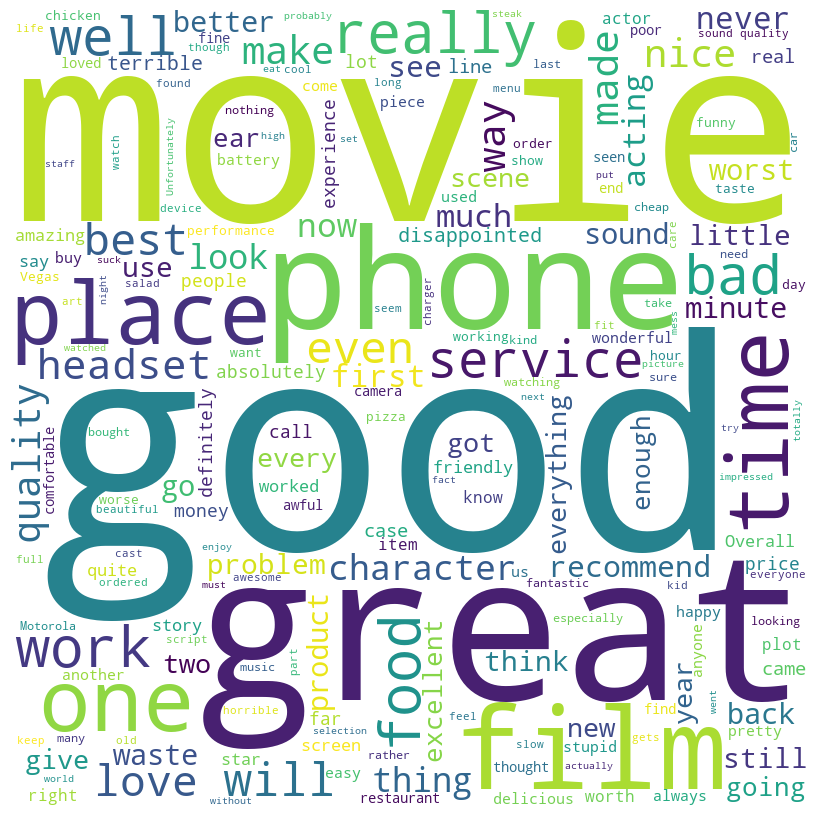

In [159]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(x_train))

plt.figure(figsize = (8, 8), facecolor = None)                
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

2. Visualize the most occurence word in training dataset with Long-tail

In [160]:
freq = np.asarray(count_train.sum(axis=0))[0]
dr = pd.DataFrame(freq, columns=['freq'])
dr['terms'] = count_vect.get_feature_names_out()
dr.sort_values(by='freq', inplace=True, ascending=False)

px.bar(dr[:100],x='terms',y='freq')

![](plotly/assign3_longtail.png)

From above visualization the top 3 most occurence in training dataset are `"good"`, `"movie"` and `"great"`

<a id='naive_bayes'></a>
### Create Naive Bayes classifier

<a id='bernoulli'></a>
#### Bernoulli Naive Bayes

Word frequency classifier preformance

              precision    recall  f1-score   support

    Positive       0.81      0.78      0.80       745
    Negative       0.79      0.82      0.81       747

    accuracy                           0.80      1492
   macro avg       0.80      0.80      0.80      1492
weighted avg       0.80      0.80      0.80      1492


TF-IDF classifier performance
              precision    recall  f1-score   support

    Positive       0.81      0.78      0.80       745
    Negative       0.79      0.82      0.81       747

    accuracy                           0.80      1492
   macro avg       0.80      0.80      0.80      1492
weighted avg       0.80      0.80      0.80      1492



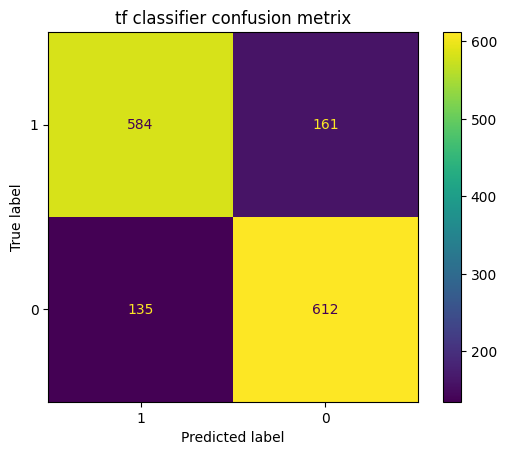

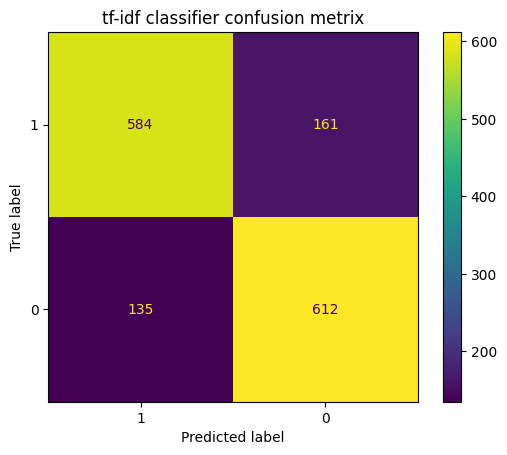

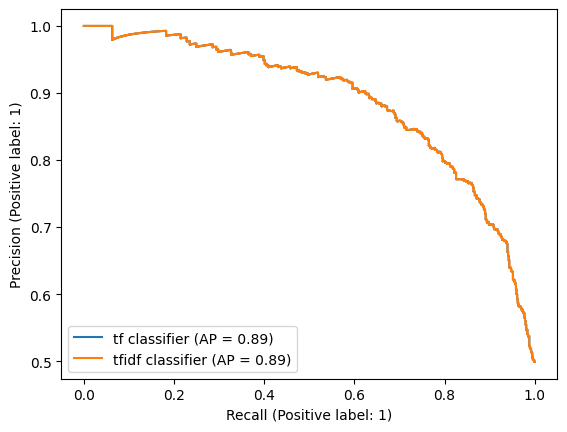

In [161]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

## Create Bernoulli naive bayes classification model from train data to predict the input messages whether it is positive(1) or negative(0) commends
### Classifier trained by word frequency feature
bernoulinb_tf = BernoulliNB(binarize=0.0)
bernoulinb_tf.fit(count_train,y_train.to_numpy())

### Classifier trained by TF-IDF feature
bernoulinb_tfidf = BernoulliNB(binarize=0.0)
bernoulinb_tfidf.fit(train_feature ,y_train.to_numpy())

## Calculate performance of each classifier
tf_pred = bernoulinb_tf.predict(count_test)
print("Word frequency classifier preformance\n")
print(metrics.classification_report(y_test.to_numpy(), tf_pred, target_names=['Positive', 'Negative'], labels=[1,0]))

tfidf_pred = bernoulinb_tfidf.predict(test_feature)
print("\nTF-IDF classifier performance")
print(metrics.classification_report(y_test.to_numpy(), tfidf_pred, target_names=['Positive', 'Negative'], labels=[1,0]))

dis = ConfusionMatrixDisplay.from_estimator(bernoulinb_tf,count_test,y_test,labels=[1,0])
dis.ax_.set_title("tf classifier confusion metrix")
dis = ConfusionMatrixDisplay.from_estimator(bernoulinb_tfidf,test_feature,y_test,labels=[1,0])
dis.ax_.set_title("tf-idf classifier confusion metrix")

_, ax = plt.subplots()
dis = PrecisionRecallDisplay.from_estimator(bernoulinb_tf, count_test, y_test ,name='tf classifier', ax=ax)
dis = PrecisionRecallDisplay.from_estimator(bernoulinb_tfidf, test_feature, y_test ,name='tfidf classifier', ax=ax)

##### Comment
The result from classifier that train with word frequency feature and TF-IDF feature are the same since bernoulli naive classifier is taking a binary feature of an input(1 if the word is present, 0 if the word is not present), so the results after binarize word frequency and  TD-IDF feature are the same which means that the classifier were trained with the same feature. Therefore the result from both classifier are the same

<a id='multinomial'></a>
#### Multinomial Naive Bayes

Word frequency classifier preformance

              precision    recall  f1-score   support

    Positive       0.80      0.80      0.80       745
    Negative       0.80      0.80      0.80       747

    accuracy                           0.80      1492
   macro avg       0.80      0.80      0.80      1492
weighted avg       0.80      0.80      0.80      1492


TF-IDF classifier performance
              precision    recall  f1-score   support

    Positive       0.80      0.81      0.81       745
    Negative       0.81      0.80      0.81       747

    accuracy                           0.81      1492
   macro avg       0.81      0.81      0.81      1492
weighted avg       0.81      0.81      0.81      1492



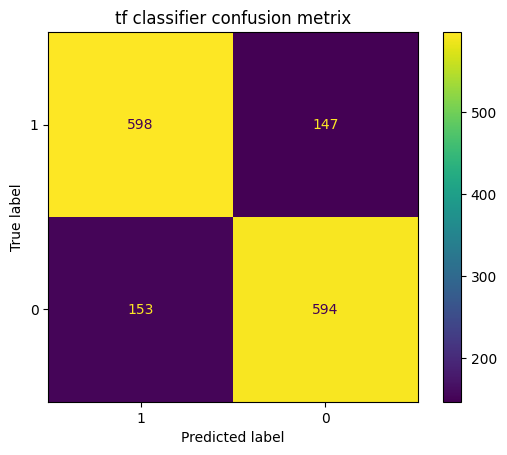

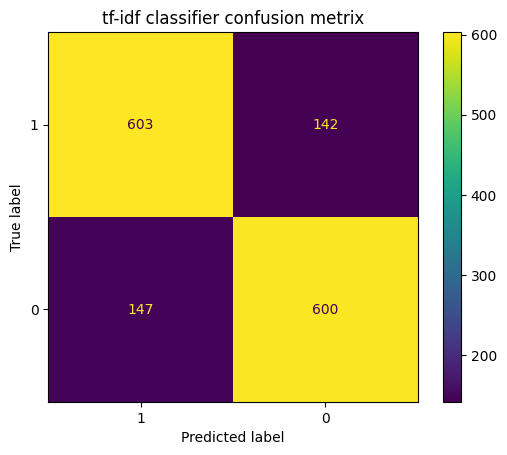

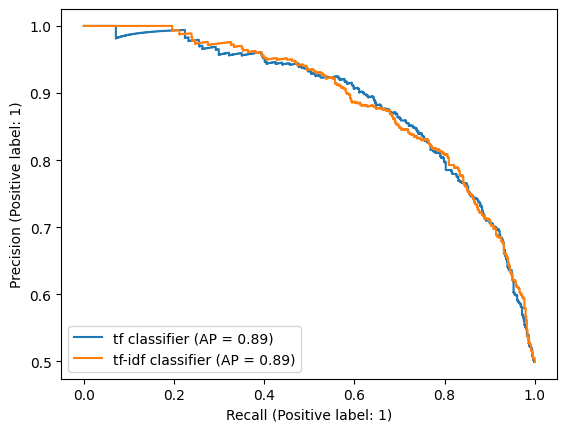

In [162]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

## Create Multinomial naive bayes classification model from train data to predict the input messages whether it is positive(1) or negative(0) commends
### Classifier trained by word frequency feature
multinb_tf = MultinomialNB()
multinb_tf.fit(count_train,y_train.to_numpy())

### Classifier trained by TF-IDF feature
multinb_tfidf = MultinomialNB()
multinb_tfidf.fit(train_feature, y_train.to_numpy())

## Calculate performance of each classifier
tf_pred = multinb_tf.predict(count_test)
print("Word frequency classifier preformance\n")
print(metrics.classification_report(y_test.to_numpy(), tf_pred, target_names=['Positive', 'Negative'], labels=[1,0]))

tfidf_pred = multinb_tfidf.predict(test_feature)
print("\nTF-IDF classifier performance")
print(metrics.classification_report(y_test.to_numpy(), tfidf_pred, target_names=['Positive', 'Negative'], labels=[1,0]))

dis = ConfusionMatrixDisplay.from_estimator(multinb_tf,count_test,y_test, labels=[1,0])
dis.ax_.set_title("tf classifier confusion metrix")
dis = ConfusionMatrixDisplay.from_estimator(multinb_tfidf, test_feature, y_test, labels=[1,0])
dis.ax_.set_title("tf-idf classifier confusion metrix")

_, ax = plt.subplots()
dis = PrecisionRecallDisplay.from_estimator(multinb_tf, count_test, y_test ,name='tf classifier', ax=ax)
dis = PrecisionRecallDisplay.from_estimator(multinb_tfidf, test_feature, y_test ,name='tf-idf classifier', ax=ax)

##### Comment

From above visualization shows that the classifier that was trained with TF-IDF has more precision(81%) and accuracy(81%) than another one, so we can assume that the classifier that was trained by TF-IDF feature can classify the text more correctly

<a id='gaussian'></a>
#### Gaussian Naive Bayes

Word frequency classifier preformance

              precision    recall  f1-score   support

    Positive       0.75      0.45      0.56       745
    Negative       0.61      0.85      0.71       747

    accuracy                           0.65      1492
   macro avg       0.68      0.65      0.64      1492
weighted avg       0.68      0.65      0.64      1492


TF-IDF classifier performance
              precision    recall  f1-score   support

    Positive       0.70      0.58      0.64       745
    Negative       0.64      0.76      0.70       747

    accuracy                           0.67      1492
   macro avg       0.67      0.67      0.67      1492
weighted avg       0.67      0.67      0.67      1492



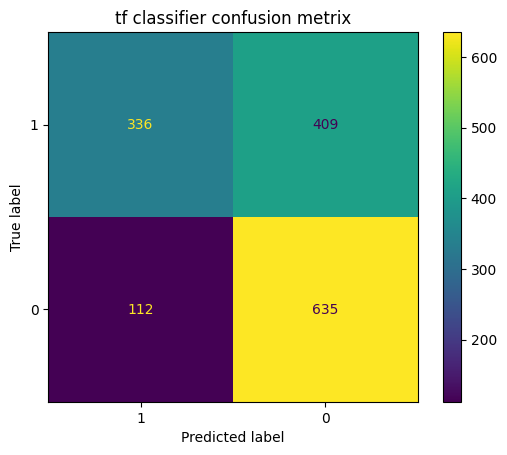

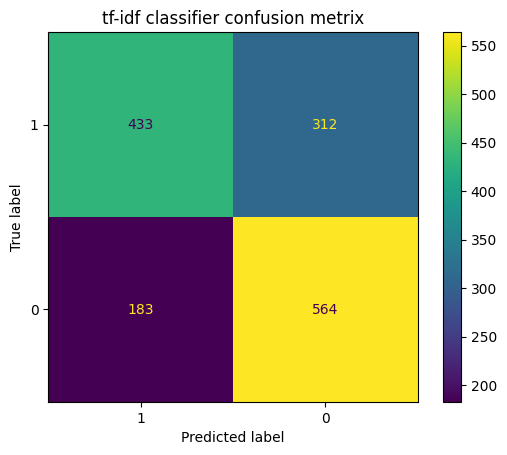

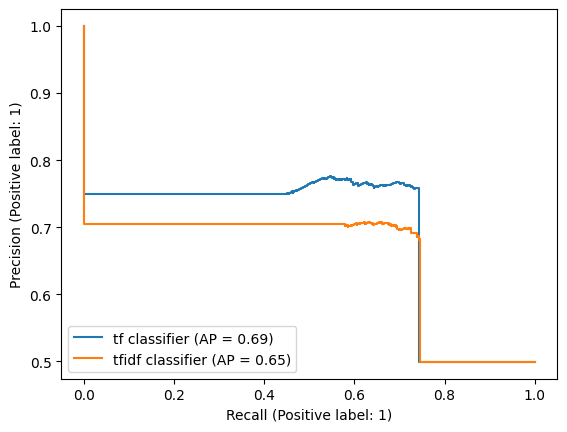

In [169]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

## Create Gaussian naive bayes classification model from train data to predict the input messages whether it is positive(1) or negative(0) commends
### Classifier trained by word frequency feature
gaussiannb_tf = GaussianNB()
gaussiannb_tf.fit(count_train.toarray(),y_train)

### Classifier trained by TF-IDF feature
gaussiannb_tfidf = GaussianNB()
gaussiannb_tfidf.fit(train_feature.toarray(),y_train)

## Calculate performance of each classifier
tf_pred = gaussiannb_tf.predict(count_test.toarray())
print("Word frequency classifier preformance\n")
print(metrics.classification_report(y_test.to_numpy(), tf_pred, target_names=['Positive', 'Negative'], labels=[1,0]))

tfidf_pred = gaussiannb_tfidf.predict(test_feature.toarray())
print("\nTF-IDF classifier performance")
print(metrics.classification_report(y_test.to_numpy(), tfidf_pred, target_names=['Positive', 'Negative'], labels=[1,0]))

dis = ConfusionMatrixDisplay.from_estimator(gaussiannb_tf, count_test.toarray(), y_test, labels=[1,0])
dis.ax_.set_title("tf classifier confusion metrix")
dis = ConfusionMatrixDisplay.from_estimator(gaussiannb_tfidf, test_feature.toarray(), y_test, labels=[1,0])
dis.ax_.set_title("tf-idf classifier confusion metrix")

_, ax = plt.subplots()
dis = PrecisionRecallDisplay.from_estimator(gaussiannb_tf, count_test.toarray(), y_test ,name='tf classifier', ax=ax)
dis = PrecisionRecallDisplay.from_estimator(gaussiannb_tfidf, test_feature.toarray(), y_test ,name='tfidf classifier', ax=ax)

##### Comment

With Gaussian naive classifier, it seems like the classifier that was trained by word frequency feature has more precision(75%) than the one that was trained by TF-IDF feature(70%). However, it has less recall(45%) than another one(58%) which means that the classifier that was trained by word frequency feature is good at dealing with True possitive case, but bad at classifying true negative case. With this reason it makes the accuracy of the classifier that was trained with TF-IDF feature is higher(67%). But after look at Precision-Recall curve it shows that the word frequency classifier has more area under curve(0.69) than TF-IDF classifier(0.65).

## Assignment 4

<a id='suggestions'></a>
### Suggestions

1. I found that the CountVectorizer funciton does not remove common stop word and punctuation from the dataset eg. 'the', 'and', 'are' and some word that does not contain any meaning eg. '00', '01' so it effects the effiectcy of the dataset and it makes the visualization does not look so meaningful.

    > To improve you can parse `stop_word='english'` parameter into CountVectorizer function to indicate the function to exclude stop words from calculation. In additional, you can indicate the function to tokenize only the word that matches our desired pattern by parsing `token_pattern=<regex>`. This might helps reduce the number of features.

2. I think in data preparation process we should extract only the body of each email by extract `From`, `Subject` and other fields that may be irrelevant to our data into a different columns, so we can get a cleaner data to process in the next step.

3. In data preparation process I think that we can reduce the computation time and load by processing a sampling data rather than process all the data we have.

4. We can try to compute the correlation of the data to find the similarity between data besides cosine similarity

5. We can try to calculate the distance between data, so we can get some information about differences the data.